# NERC

**TODO: Add description**

In [17]:
# add all imports here
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os

from prettytable import PrettyTable

## Preprocessing
Change all instances of "geo" to "loc" and "gpe" to "misc" to match with the test set. 
Commented out since the new training set is already saved as a file to save time in future runs. 

In [1]:
# start_time = time.time()
# unprocessed_data = pd.read_csv(filepath_or_buffer="data/train/ner_dataset.csv", sep=",", error_bad_lines=False, encoding= "unicode_escape")
# # unprocessed_data = unprocessed_data[:10000]
# for i, tag in enumerate(unprocessed_data["Tag"]):
#     if "geo" in tag:
#         unprocessed_data["Tag"][i] = unprocessed_data["Tag"][i].replace("geo", "loc")
#     elif "gpe" in tag:
#         unprocessed_data["Tag"][i] = unprocessed_data["Tag"][i].replace("gpe", "misc")
# print(unprocessed_data["Tag"][102])
# print("--- %s seconds ---" % (time.time() - start_time))
# unprocessed_data.to_csv(path_or_buf="data/train/new_ner_dataset.csv", sep=",", index=False)

C:\Users\Omer\AppData\Local\Temp\ipykernel_12680\1733432153.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  unprocessed_data = pd.read_csv(filepath_or_buffer="data/train/ner_dataset.csv", sep=",", error_bad_lines=False, encoding= "unicode_escape")


B-misc
--- 163.0342619419098 seconds ---


## EDA

In [7]:
df = pd.read_csv('data/train/new_ner_dataset.csv', sep=",", error_bad_lines=False, encoding= "unicode_escape")

/var/folders/9p/5zh9t8v14h9c19sssjwwlz940000gp/T/ipykernel_27891/371074509.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data/train/new_ner_dataset.csv', sep=",", error_bad_lines=False, encoding= "unicode_escape")


In [30]:
# first insight into the data
print("Total number of sentences: ", len(df["Sentence #"].unique()))

print("Total number of words: ", len(df["Word"]))
print("Total number of unique words: ", len(df["Word"].unique()))

print("Total number of tags: ", len(df["Tag"]))
print("Total number of unique tags: ", len(df["Tag"].unique()))



Total number of sentences:  47960
Total number of words:  1048575
Total number of unique words:  35178
Total number of tags:  1048575
Total number of unique tags:  17


O         887908
B-loc      37644
B-tim      20333
B-org      20143
I-per      17251
B-per      16990
I-org      16784
B-misc     15870
I-loc       7414
I-tim       6528
B-art        402
B-eve        308
I-art        297
I-eve        253
B-nat        201
I-misc       198
I-nat         51
Name: Tag, dtype: int64


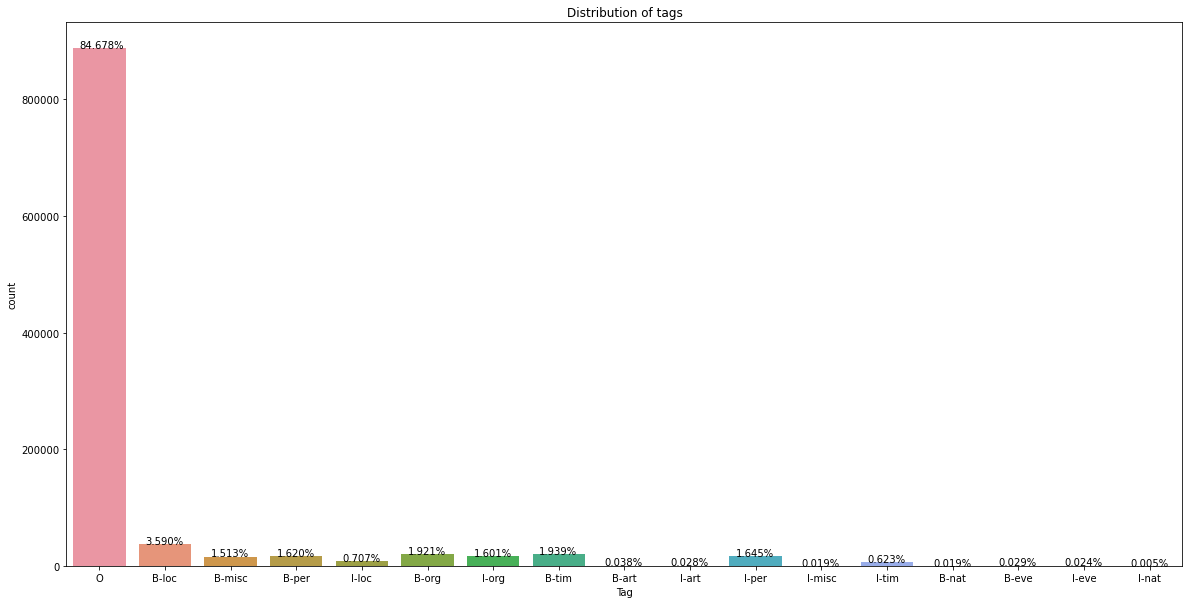

<Figure size 432x288 with 0 Axes>

In [28]:
# more insight into the data
print(df["Tag"].value_counts())

# plot the distribution of the tags
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="Tag", data=df)
# add counts and percentages to the plot
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.1, p.get_height()+300))

# set the title of the plot
plt.title("Distribution of tags")
plt.show()
plt.savefig("figures/distribution_of_tags_barplot.png")





NN      145807
NNP     131426
IN      120996
DT       98454
JJ       78412
NNS      75840
.        47831
VBD      39379
,        32757
VBN      32328
VBZ      24960
CD       24695
VB       24211
CC       23716
TO       23061
RB       20252
VBG      19125
VBP      16158
PRP      13318
POS      11257
PRP$      8655
MD        6973
``        3728
WDT       3698
JJS       3034
JJR       2967
WP        2542
NNPS      2521
RP        2490
WRB       2184
$         1149
RBR       1055
:          795
RRB        679
LRB        678
EX         663
RBS        296
;          214
PDT        147
WP$         99
UH          24
FW           1
Name: POS, dtype: int64


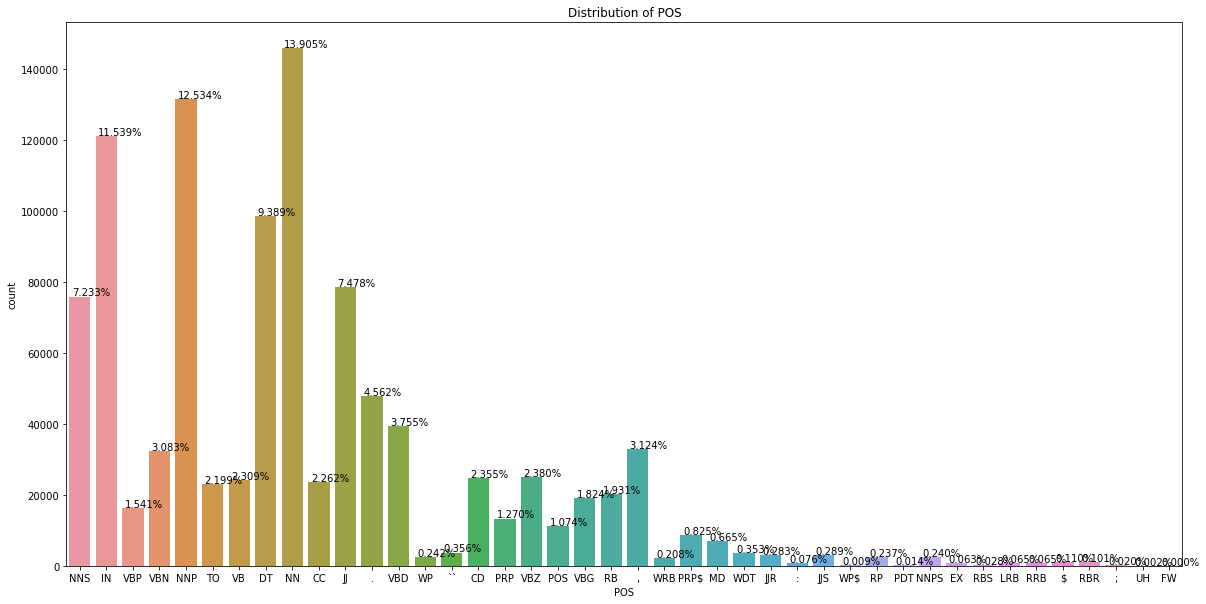

<Figure size 432x288 with 0 Axes>

In [31]:
# more insight into the data for POS tags (might be useful for the future)
print(df["POS"].value_counts())

# plot the distribution of the tags
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="POS", data=df)
# add counts and percentages to the plot
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.1, p.get_height()+300))

# set the title of the plot
plt.title("Distribution of POS")
plt.show()
plt.savefig("figures/distribution_of_pos_barplot.png")



In [36]:
# fill the sentence # column with the sentence number
df["Sentence #"] = df["Sentence #"].fillna(method="ffill")

3     10621
4      9419
2      8856
1      7042
5      6551
6      3477
7      1440
8       461
9        86
10        5
11        1
Name: Tag, dtype: int64


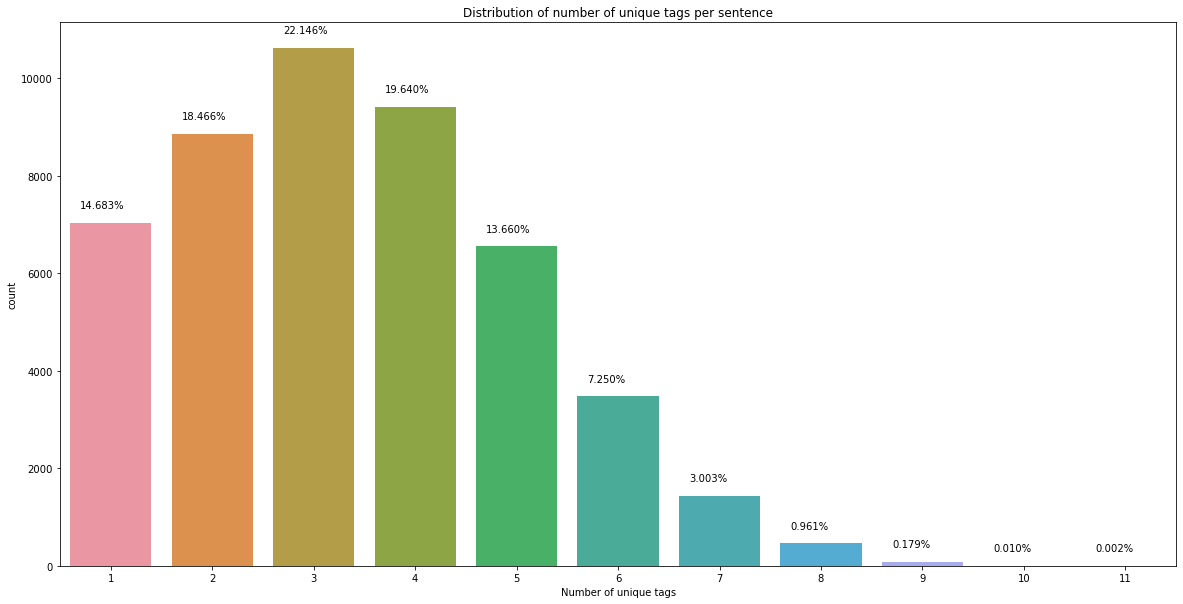

<Figure size 432x288 with 0 Axes>

In [45]:

# compare the unique tags on the sentence level

# get the unique tags for each sentence
unique_tags = df.groupby("Sentence #")["Tag"].unique()
# find the number of unique tags for each sentence
unique_tags_count = unique_tags.apply(lambda x: len(x))
# print the number of unique tags for each sentence
print(unique_tags_count.value_counts())

# create a df with the number of unique tags for each sentence
d = pd.DataFrame(unique_tags_count)
d = d.reset_index()
d.columns = ["Sentence #", "Number of unique tags"]


#plot the distribution of the number of unique tags for each sentence
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="Number of unique tags", data=d)
# add percentages to the plot
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(d)), (p.get_x()+0.1, p.get_height()+300))


# set the title of the plot
plt.title("Distribution of number of unique tags per sentence")
plt.show()
plt.savefig("figures/distribution_of_unique_tags_per_sentence_barplot.png")




## MODEL TRAINING

## EVALUATION

### VALIDATION SET

### TEST SET